# Black–Scholes Option Pricing

This notebook introduces the Black–Scholes model, a foundational framework for pricing European options.

Included:
1. State the pricing formula for European call and put options.
2. Implement it in Python.
3. Visualize how option prices change with volatility, time to maturity, and strike.

The Black–Scholes model assumes:
- Constant volatility $\sigma$.
- Constant risk-free rate $r$.
- Lognormally distributed asset prices following a geometric Brownian motion.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from option_pricing.black_scholes import black_scholes_price

### Formula Summary

The Black–Scholes price of a European call is:

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

where

$$
d_1 = \frac{\ln(S_0/K) + (r + \tfrac{1}{2}\sigma^2)T}{\sigma \sqrt{T}}, 
\quad 
d_2 = d_1 - \sigma \sqrt{T}
$$

and for a put:

$$
P = K e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

Assuming: constant 𝑟 (risk-free rate), 𝜎 (volatility), no dividends, and lognormally distributed $𝑆_T$

- d1 measures how far the expected future price is above the strike in standard deviations
- d2 measures how far the (discounted) forward price is from the stike price in standard deviations 

## Define Parameters

Beginning with a basic European call option example.

In [ ]:
S0 = 100   # current stock price
K = 100    # strike price
T = 1.0    # time to maturity (in years)
r = 0.05   # risk-free interest rate
sigma = 0.2  # volatility

plt.style.use("seaborn-v0_8-darkgrid")

call_price = black_scholes_price(S0, K, T, r, sigma, option_type="call")
put_price = black_scholes_price(S0, K, T, r, sigma, option_type="put")

print(f"European Call Option Price: {call_price:.2f}")
print(f"European Put Option Price:  {put_price:.2f}")

European Call Option Price: 10.45
European Put Option Price:  5.57


## Sensitivity to Volatility (Vega)

We can now examine how the option price changes as volatility $\sigma$ varies.

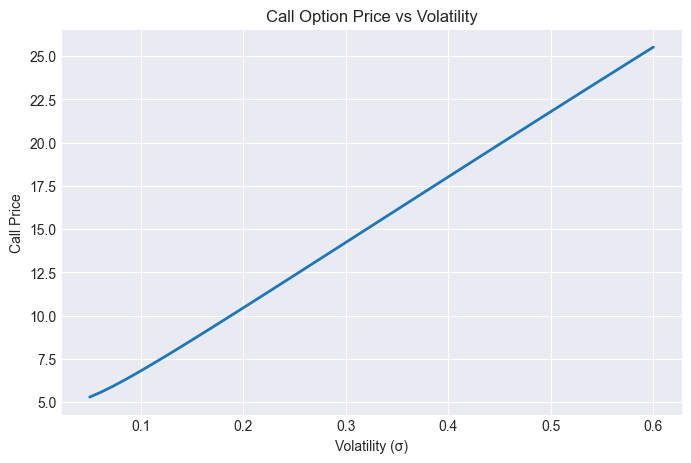

In [8]:
sigmas = np.linspace(0.05, 0.6, 50)
prices = [black_scholes_price(S0, K, T, r, s, option_type="call") for s in sigmas]

plt.figure(figsize=(8,5))
plt.plot(sigmas, prices, lw=2)
plt.title("Call Option Price vs Volatility")
plt.xlabel("Volatility (σ)")
plt.ylabel("Call Price")
plt.grid(True)
plt.show()

## Sensitivity to Time to Maturity (Theta)

$T$ is varied while keeping other parameters fixed.

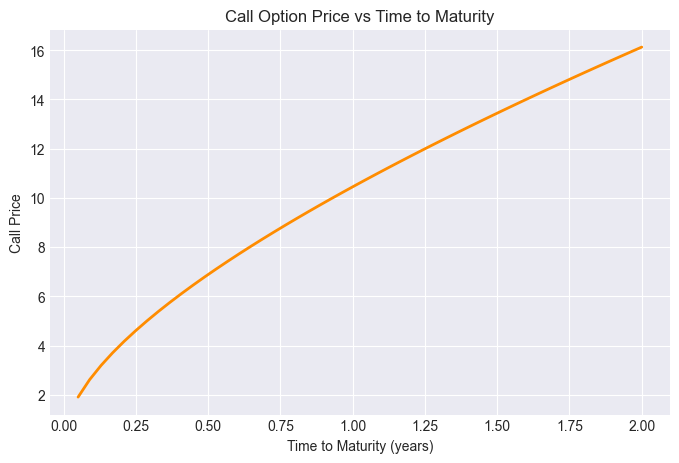

In [9]:
times = np.linspace(0.05, 2.0, 50)
prices_T = [black_scholes_price(S0, K, t, r, sigma, option_type="call") for t in times]

plt.figure(figsize=(8,5))
plt.plot(times, prices_T, lw=2, color='darkorange')
plt.title("Call Option Price vs Time to Maturity")
plt.xlabel("Time to Maturity (years)")
plt.ylabel("Call Price")
plt.grid(True)
plt.show()

## Sensitivity to Strike Price (Moneyness)

Visualising the price changes as the strike price $K$ changes (in/out of the money).

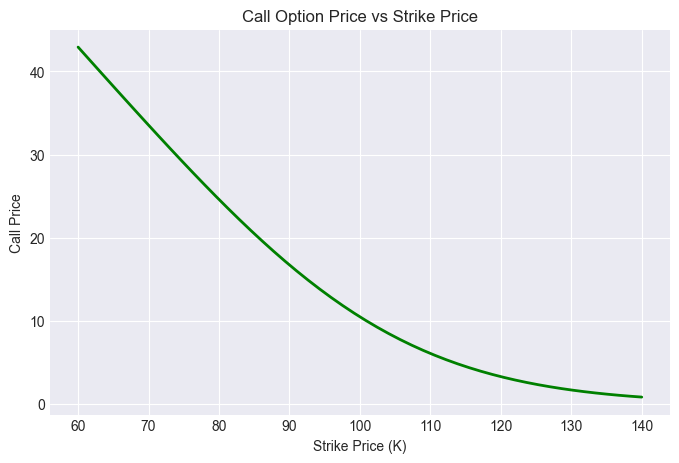

In [10]:
Ks = np.linspace(60, 140, 50)
prices_K = [black_scholes_price(S0, k, T, r, sigma, option_type="call") for k in Ks]

plt.figure(figsize=(8,5))
plt.plot(Ks, prices_K, lw=2, color='green')
plt.title("Call Option Price vs Strike Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Call Price")
plt.grid(True)
plt.show()

## Summary

- Implemented the Black–Scholes pricing formula for European call/put options.
- Analyzed the impact of volatility, time to maturity, and strike on option value.
- This model assumes constant volatility and lognormal returns.

